In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import empiricaldist
from statadict import parse_stata_dict

dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

In [3]:
from statadict import parse_stata_dict
stata_dict = parse_stata_dict(dict_file)

import gzip
fp = gzip.open(data_file)


import pandas as pd
gss = pd.read_fwf(fp, names=stata_dict.names, colspecs = stata_dict.colspecs)
print(gss.shape)
print(gss.head())

(64814, 8)
   YEAR  ID_  AGE  EDUC  GENDER  GUNLAW  GRASS  REALINC
0  1972    1   23    16       2       1      0  18951.0
1  1972    2   70    10       1       1      0  24366.0
2  1972    3   48    12       2       1      0  24366.0
3  1972    4   27    17       2       1      0  30458.0
4  1972    5   61    12       2       1      0  50763.0


In [4]:
print(gss['EDUC'].value_counts().sort_index())

EDUC
0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: count, dtype: int64


In [5]:
educ = gss['EDUC'].replace([98,99],np.nan)

Text(0.5, 1.0, 'Histogram of education level')

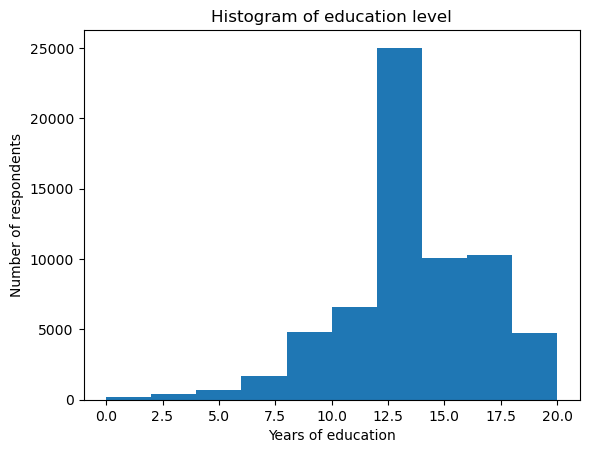

In [6]:
educ.hist(grid=False)
plt.xlabel('Years of education')
plt.ylabel('Number of respondents')
plt.title('Histogram of education level')

In [9]:
from empiricaldist import Pmf
pmf_edu = Pmf.from_seq(educ, normalize=False)
print(type(pmf_edu))
print(pmf_edu.head())
print(pmf_edu.tail())
print(pmf_edu[20])

<class 'empiricaldist.empiricaldist.Pmf'>
EDUC
0.0    165
1.0     47
2.0    152
Name: count, dtype: int64
EDUC
18.0    2384
19.0     920
20.0    1439
Name: count, dtype: int64
1439


In [10]:
pmf_educ_norm = Pmf.from_seq(educ,normalize=True)
print(pmf_educ_norm.head())
print(pmf_educ_norm[12]) #sample for 12 years of experience

EDUC
0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: proportion, dtype: float64
0.30420656899299164


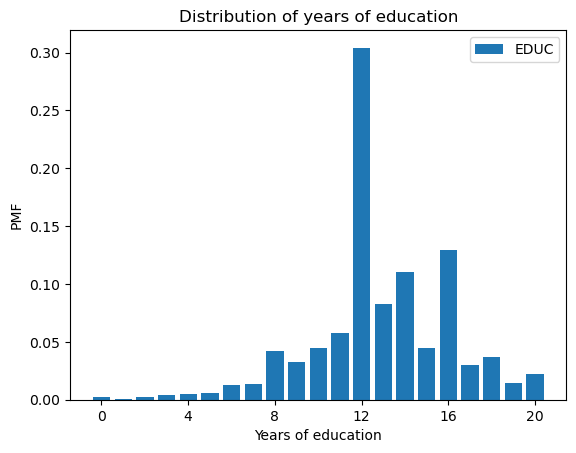

In [28]:
pmf_educ_norm.bar(label='EDUC')
plt.xlabel('Years of education')
plt.xticks(range(0,21,4))
plt.ylabel('PMF')
plt.title('Distribution of years of education')
plt.legend()

In [12]:
#Now CDF
from empiricaldist import Cdf

Text(0.5, 1.0, 'Distribution of education')

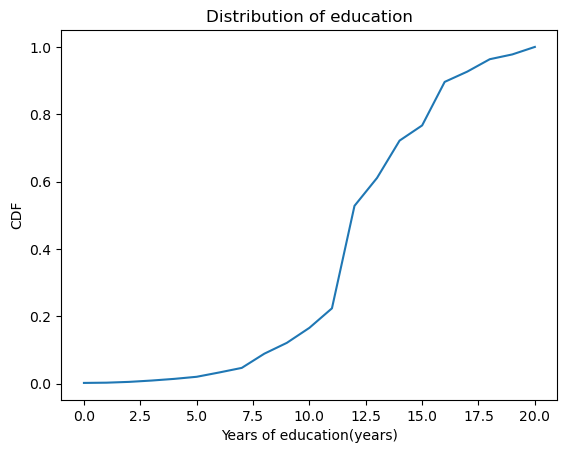

In [14]:
educ = gss['EDUC'].replace([98,99],np.nan)
cdf_educ = Cdf.from_seq(educ)
cdf_educ.plot()
plt.xlabel('Years of education(years)')
plt.ylabel('CDF')
plt.title('Distribution of education')

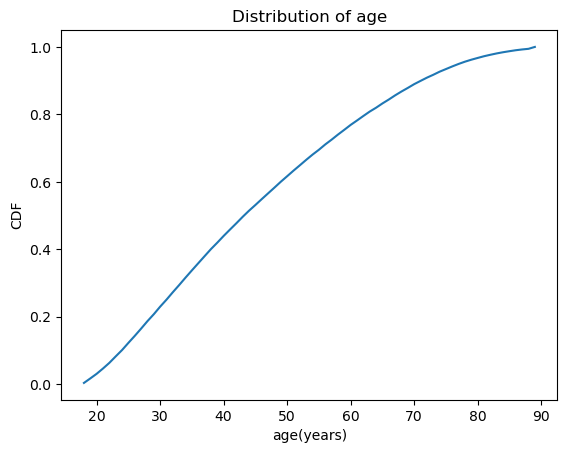

In [24]:
age = gss['AGE'].replace([98,99],np.nan)
cdf_age = Cdf.from_seq(age)
cdf_age.plot()
plt.xlabel('age(years)')
plt.ylabel('CDF')
plt.title('Distribution of age')
plt.show()

0.6331867587402843
31.0
59.0
28.0
Q1:31.0,Q3:59.0


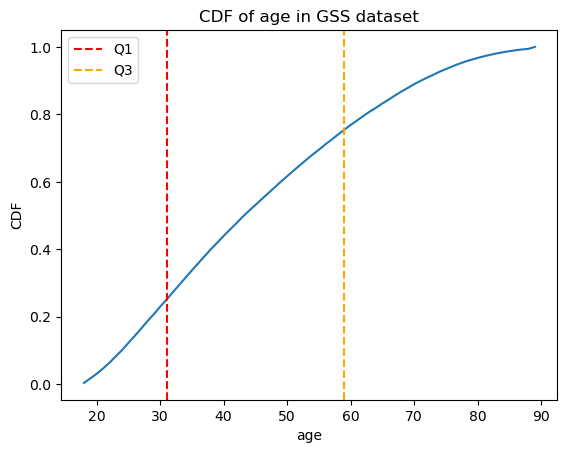

In [26]:

#we can also obtain the cumulative probablity up to a certain point, eg: age 51:
q=51
p=cdf_age(q)
print(p)

#about 63% of the respondents are 51 years old or younger

#Inversely, find the age  at a certain value of sumulative probablity:
p1=0.25
q1=cdf_age.inverse(p1)
print(q1)
#25% of the respondents are age 31 or less. Another way to say the same thing is age 31 is the 25th percentile of this distribution
p3=0.75
q3=cdf_age.inverse(p3)
print(q3)
print(q3-q1)
print(f"Q1:{q1},Q3:{q3}")

cdf_age= empiricaldist.Cdf.from_seq(age)
cdf_values=cdf_age.values
data_points=cdf_age.index
plt.plot(data_points,cdf_values)
plt.axvline(x=q1,color='red', linestyle='--',label='Q1')
plt.axvline(x=q3,color='orange', linestyle='--',label='Q3')
plt.xlabel('age')
plt.ylabel('CDF')
plt.title('CDF of age in GSS dataset')
plt.legend()

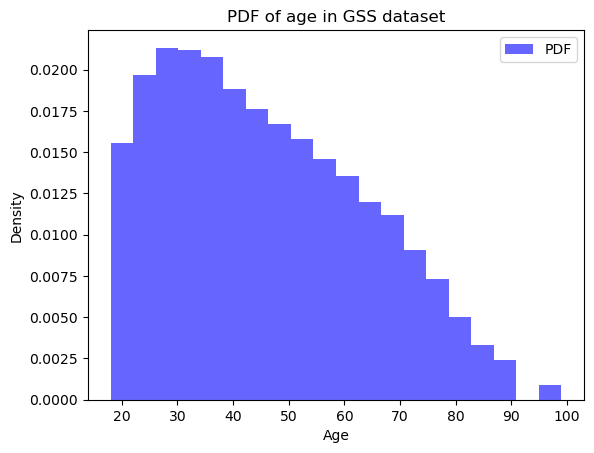

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


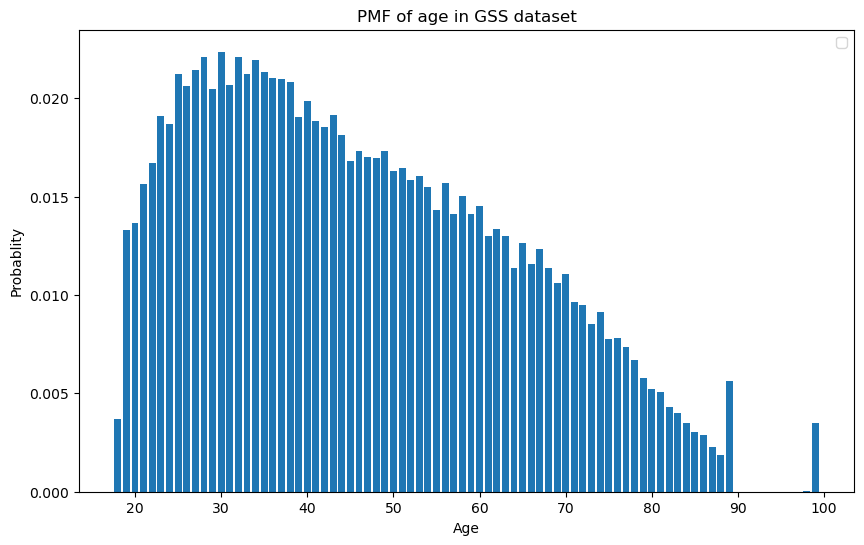

In [27]:
#Kernel density estimation or PDF

age_data = gss['AGE']

#create a histogram to visualize the PDF
plt.hist(age_data, bins=20,density=True,alpha=0.6,color='b',label='PDF')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('PDF of age in GSS dataset')
plt.legend()
plt.show()

#Corresponding PMF
pmf = age_data.value_counts(normalize=True).sort_index()

#create a bar plot of the PMF
plt.figure(figsize=(10,6))
plt.bar(pmf.index,pmf.values)
plt.xlabel('Age')
plt.ylabel('Probablity')
plt.title('PMF of age in GSS dataset') #discrete data
plt.legend()

In [30]:
q=65
p=cdf_age(q)
print(1-p)

0.16757501625739324


ValueError: Incorrect use of keyword argument 'rotation'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

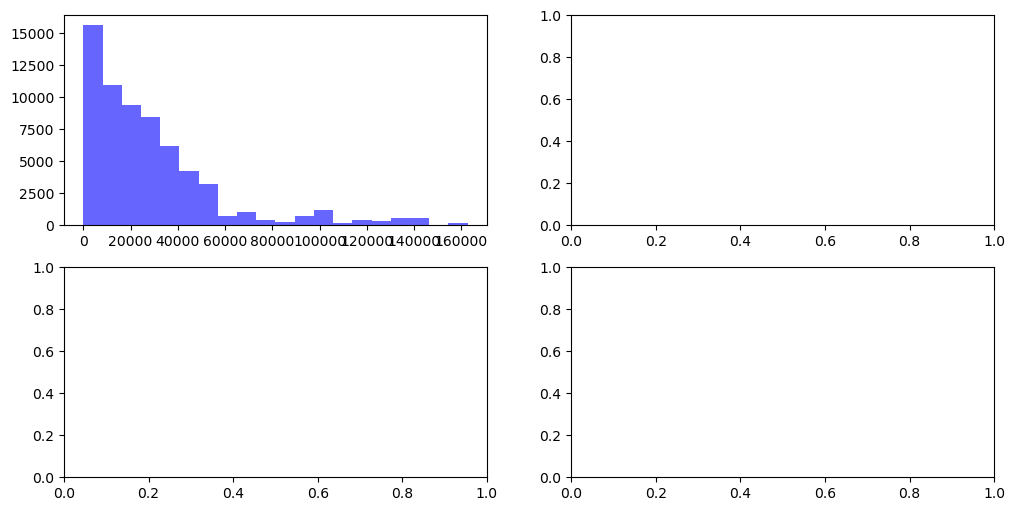

<Figure size 600x600 with 0 Axes>

In [85]:
import seaborn as sns

income = gss['REALINC'].replace([98,99],np.nan)


fig, axs = plt.subplots(2, 2, figsize=(12, 6))

plt.figure(figsize=(6,6))
pmf_income = Pmf.from_seq(income)
axs[0][0].hist(income, bins=20,density=False,alpha=0.6,color='b',label='PDF')
plt.set_xticks(rotation=45)
# axs[0].plot(pmf_income)
axs[0][0].set_xlabel('pmf_income($)')
axs[0][0].set_ylabel('PMF')
axs[0][0].set_title('Distribution of income')



# cdf_income = Cdf.from_seq(income)
# axs[1].plot(cdf_income)
# axs[1].set_xlabel('cdf_income($)')
# axs[1].set_ylabel('CDF')
# axs[1].set_title('Distribution of income')
plt.show()

Text(0.5, 1.0, 'Distribution of income')

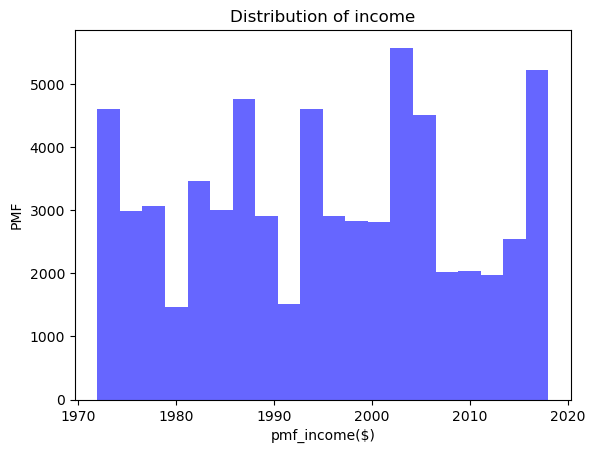

In [79]:
pmf_years = Pmf.from_seq(gss['YEAR'])
plt.hist(gss['YEAR'], bins=20,density=False,alpha=0.6,color='b',label='PDF')
# plt.xticks(rotation=45)
plt.plot(pmf_years)
plt.xlabel('Year')
plt.ylabel('PMF')
plt.title('Distribution of income')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


PMF at 2018:  2348


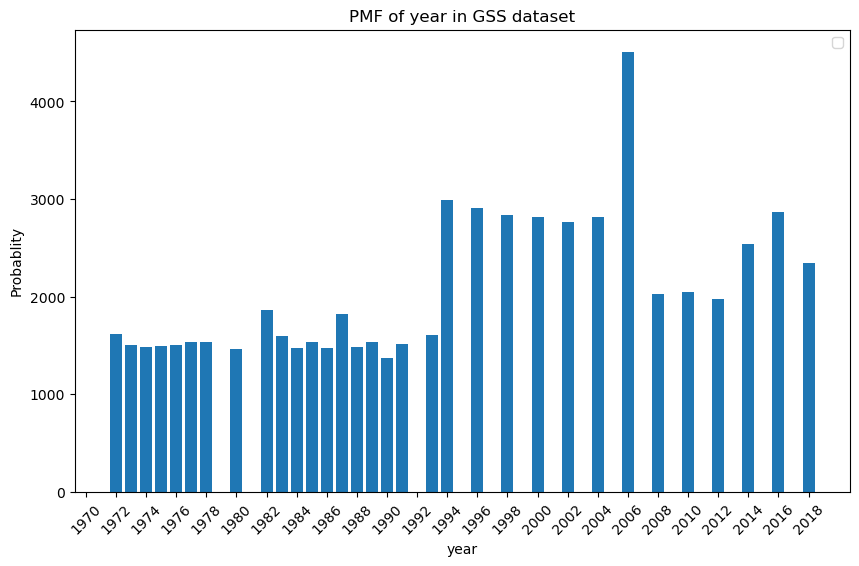

In [98]:
pmf_year = gss['YEAR'].value_counts(normalize=False).sort_index()

#create a bar plot of the PMF
plt.figure(figsize=(10,6))
plt.bar(pmf_year.index,pmf_year.values)
plt.xticks(range(1970,2020,2),rotation=45)
plt.xlabel('year')
plt.ylabel('Probablity')
plt.title('PMF of year in GSS dataset') #discrete data
plt.legend()
print('PMF at 2018: ',pmf_year[2018])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
64809    2018
64810    2018
64811    2018
64812    2018
64813    2018
Name: YEAR, Length: 64814, dtype: int64
YEAR
1972    0.024887
1973    0.023205
1974    0.022896
1975    0.022989
1976    0.023128
1977    0.023606
1978    0.023637
1980    0.022649
1982    0.028698
1983    0.024671
1984    0.022727
1985    0.023668
1986    0.022680
1987    0.028065
1988    0.022850
1989    0.023714
1990    0.021168
1991    0.023405
1993    0.024779
1994    0.046163
1996    0.044805
1998    0.043694
2000    0.043463
2002    0.042661
2004    0.043386
2006    0.069584
2008    0.031212
2010    0.031536
2012    0.030456
2014    0.039158
2016    0.044234
2018    0.036227
Name: proportion, dtype: float64
PMF at 2018:  0.03622674113617428


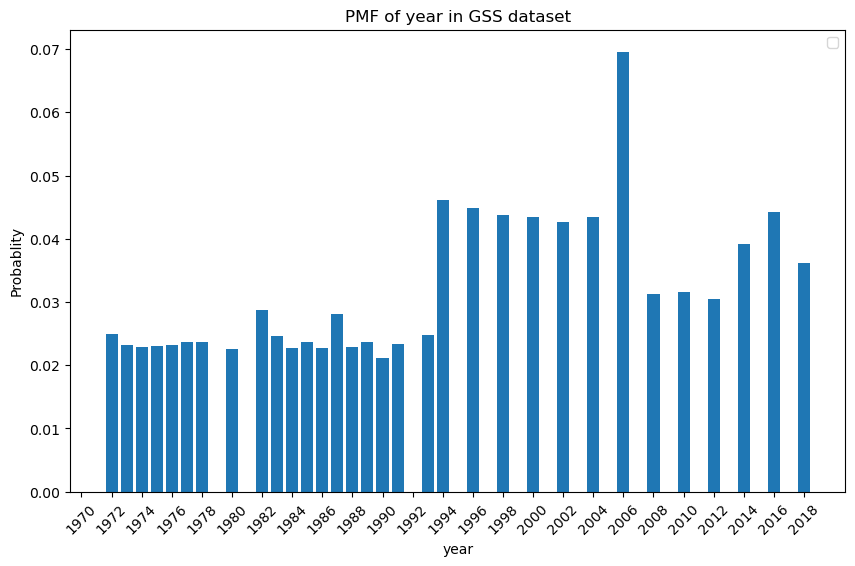

In [112]:
pmf_year = gss['YEAR'].value_counts(normalize=False).sort_index()

#create a bar plot of the PMF
plt.figure(figsize=(10,6))
pmf_year = Pmf.from_seq(year)
print(year)
print(pmf_year)
plt.bar(pmf_year.index,pmf_year.values)
plt.xticks(range(1970,2020,2),rotation=45)
plt.xlabel('year')
plt.ylabel('Probablity')
plt.title('PMF of year in GSS dataset') #discrete data
plt.legend()
print('PMF at 2018: ',pmf_year[2018])

1.0


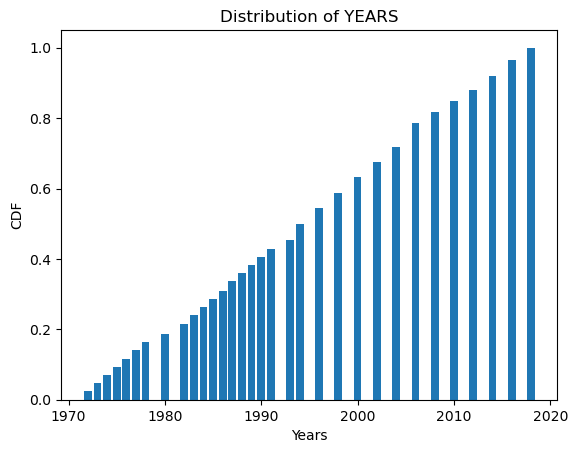

In [107]:
year = gss['YEAR'].value_counts(normalize=True).sort_index()


cdf_year = Cdf.from_seq(year)
plt.bar(cdf_year.index,cdf_year.values)
cdf_year.plot()
plt.xlabel('Years')
plt.ylabel('CDF')
plt.title('Distribution of YEARS')
print(year[2018])